In [397]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/temp_density_tree.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["T"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Density <= 1.18
|   |--- Density <= 1.14
|   |   |--- value: [70.00]
|   |--- Density >  1.14
|   |   |--- Density <= 1.15
|   |   |   |--- value: [65.00]
|   |   |--- Density >  1.15
|   |   |   |--- value: [60.00]
|--- Density >  1.18
|   |--- Density <= 1.31
|   |   |--- TiO2 <= 0.03
|   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |--- Density <= 1.23
|   |   |   |   |   |--- Density <= 1.20
|   |   |   |   |   |   |--- value: [50.00]
|   |   |   |   |   |--- Density >  1.20
|   |   |   |   |   |   |--- value: [42.50]
|   |   |   |   |--- Density >  1.23
|   |   |   |   |   |--- Density <= 1.25
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |   |   |--- Density >  1.25
|   |   |   |   |   |   |--- value: [22.50]
|   |   |   |--- Al2O3 >  0.03
|   |   |   |   |--- Density <= 1.26
|   |   |   |   |   |--- Density <= 1.24
|   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |--- Density >  1.24
|   |   |   |   |   |   |--- value: [65.00]
|   |   |   |   |--- Den

In [398]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

27

[if (Density > 1.177) and (Density > 1.308) and (Density <= 1.565) and (Density > 1.374) and (Density > 1.391) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.227) and (Density > 1.248) -> 22.5,
 if (Density <= 1.177) and (Density > 1.14) and (Density > 1.154) -> 60.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.227) and (Density <= 1.199) -> 50.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density <= 1.227) and (Density > 1.199) -> 42.5,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (Density > 1.227) and (Density <= 1.248) -> 35.0,
 if (Density <= 1.177) and (Density > 1.14) and (Density <= 1.154) -> 65.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) and (Density <= 1.265) and (Density <= 1.238) -> 70.0,
 if (Dens

In [399]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

27

[if (Density > 1.177) and (Density <= 1.565) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.177) and (Density > 1.14) -> 60.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 50.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 42.5,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 35.0,
 if (Density <= 1.177) and (Density > 1.14) -> 65.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 70.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 65.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 55.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 50.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 > 0.025) 

In [400]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

15

[if (Density > 1.177) and (Density <= 1.565) and (Al2O3 > 0.025) -> 20.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) -> 37.5,
 if (Density <= 1.177) and (Density > 1.14) -> 62.5,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 60.0,
 if (Density > 1.177) and (Density <= 1.308) and (TiO2 > 0.025) -> 65.0,
 if (Density > 1.177) and (Density <= 1.565) -> 37.5,
 if (Density > 1.177) and (Density <= 1.565) and (Al2O3 <= 0.025) -> 22.5,
 if (Density <= 1.177) -> 70.0,
 if (Density > 1.177) and (Density <= 1.93) -> 70.0,
 if (Density > 1.177) and (Density <= 1.93) and (Al2O3 <= 0.15) -> 65.0,
 if (Density > 1.177) and (Density <= 1.93) and (Al2O3 > 0.15) -> 50.0,
 if (Density > 1.177) and (Density <= 2.092) and (Al2O3 <= 0.15) -> 50.0,
 if (Density > 1.177) and (Al2O3 <= 0.15) -> 30.0,
 if (Density > 1.177) and (Density <= 1.949) and (Al2O3 > 0.15) -> 30.0,
 if (Density > 1.177) and (Al2O3 > 0.15) -> 22.5]

In [401]:
train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

train["Density"] = pow(train["Density"], 4)
test["Density"] = pow(test["Density"], 4)

display(train.head(3))
display(test.head(3))
train.describe().transpose()

T  Al2O3  TiO2   Density
0  20    0.0   0.0  1.274429
1  25    0.0   0.0  1.261477
2  35    0.0   0.0  1.234322

T  Al2O3  TiO2   Density
0  30   0.00   0.0  1.248056
1  55   0.00   0.0  1.176984
2  25   0.05   0.0  1.382694

count       mean        std        min        25%        50%  \
T         38.0  45.526316  16.513282  20.000000  31.250000  45.000000   
Al2O3     38.0   0.078947   0.126080   0.000000   0.000000   0.000000   
TiO2      38.0   0.057895   0.108133   0.000000   0.000000   0.000000   
Density   38.0   1.535064   0.344161   1.133485   1.251234   1.374444   

               75%        max  
T        60.000000  70.000000  
Al2O3     0.050000   0.300000  
TiO2      0.050000   0.300000  
Density   1.867887   2.205183

In [402]:
from src.rules import simplify_rules

rules = simplify_rules(train, rules)
display(len(rules))
rules

15

[if (Density = 1.371) and (Al2O3 = 0.3) -> 20.0,
 if (Density = 1.242) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 37.5,
 if (Density = 1.158) -> 62.5,
 if (Density = 1.242) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 60.0,
 if (Density = 1.242) and (TiO2 = 0.3) -> 65.0,
 if (Density = 1.371) -> 37.5,
 if (Density = 1.371) and (Al2O3 = 0.0) -> 22.5,
 if (Density = 1.133) -> 70.0,
 if (Density = 1.553) -> 70.0,
 if (Density = 1.553) and (Al2O3 = 0.0) -> 65.0,
 if (Density = 1.553) and (Al2O3 = 0.3) -> 50.0,
 if (Density = 1.635) and (Al2O3 = 0.0) -> 50.0,
 if (Density = 2.205) and (Al2O3 = 0.0) -> 30.0,
 if (Density = 1.563) and (Al2O3 = 0.3) -> 30.0,
 if (Density = 2.205) and (Al2O3 = 0.3) -> 22.5]

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


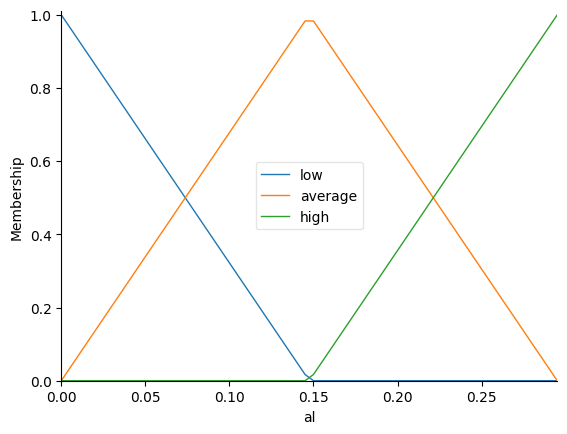

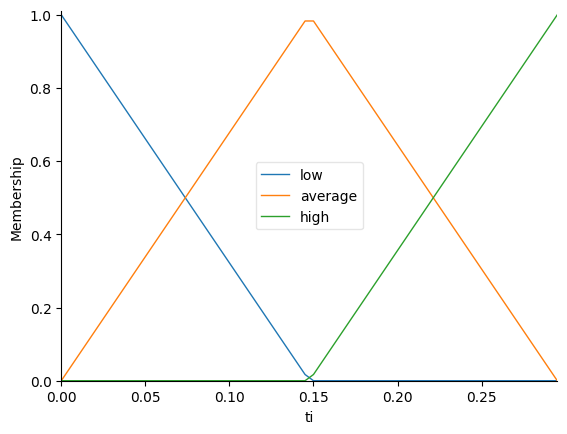

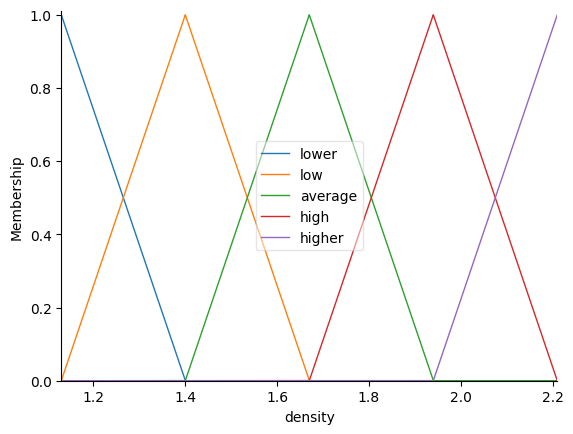

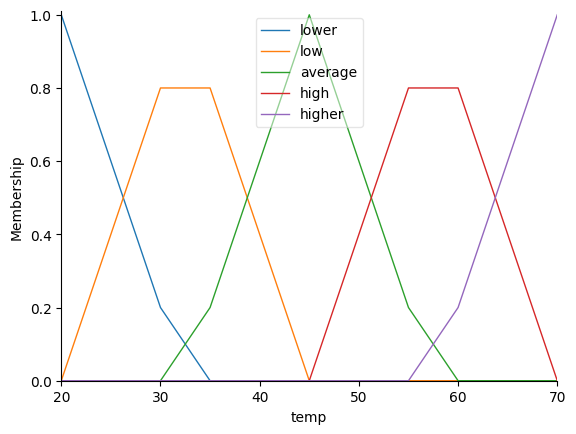

In [403]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
density = ctrl.Antecedent(np.arange(1.13, 2.21, 0.00001), "density")
temp = ctrl.Consequent(train["T"].sort_values().unique(), "temp")

al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(5, variable_type="quant")
density.view()
temp.automf(5, variable_type="quant")
temp.view()

In [410]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Density": density, "consequent": temp}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)
fuzzy_rules.remove(fuzzy_rules[5])

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

11

[IF density[low] AND al[high] THEN temp[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[lower] AND ti[low]) AND al[low] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[lower] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[lower] AND ti[low]) AND al[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[lower] AND ti[high] THEN temp[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND al[low] THEN temp[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] THEN temp[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] AND al[low] THEN temp[higher]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[average] AND al[high] THEN temp[average]
 	AND

 Antecedents 
Antecedent: density                 = 1.247779461633941
  - lower                           : 0.5637757326154149
  - low                             : 0.4362242673845851
  - average                         : 0.0
  - high                            : 0.0
  - higher                          : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF density[low] AND al[high] THEN temp[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - density[low]                                           : 0.4362242673845851
  - al[high]                                               : 0.0
                                 density[low] AND

np.float64(43.68948509302114)

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


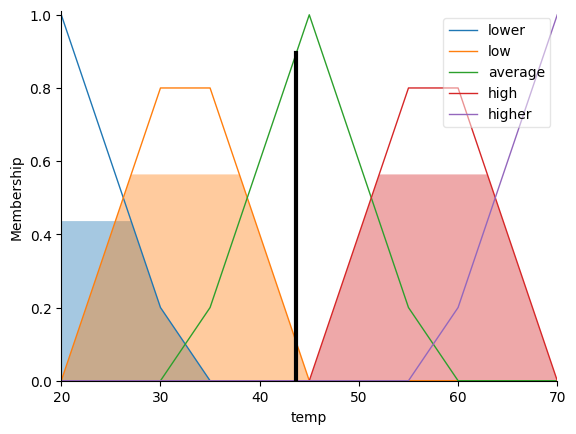

In [411]:
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.input["density"] = pow(1.0569013636039, 4)
sim.compute()
sim.print_state()
display(sim.output["temp"])
temp.view(sim=sim)

In [412]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.input["density"] = row["Density"]
    sim.compute()
    return sim.output["temp"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


result_train = train.copy()
result_train["Real"] = result_train["T"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train.head(15)

T  Al2O3  TiO2   Density  Real   Inferred    RMSE
0   20   0.00   0.0  1.274429    20  42.835502  22.836
1   25   0.00   0.0  1.261477    25  43.331606  18.332
2   35   0.00   0.0  1.234322    35  43.986276   8.986
3   40   0.00   0.0  1.220283    40  44.153422   4.153
4   45   0.00   0.0  1.205995    45  44.307892   0.692
5   50   0.00   0.0  1.191469    50  44.452879   5.547
6   60   0.00   0.0  1.162049    60  44.715013  15.285
7   65   0.00   0.0  1.146814    65  44.849617  20.150
8   70   0.00   0.0  1.133485    70  44.968670  25.031
9   20   0.05   0.0  1.398933    20  25.524792   5.525
10  45   0.05   0.0  1.315949    45  40.896200   4.104
11  50   0.05   0.0  1.299075    50  41.694263   8.306
12  55   0.05   0.0  1.282075    55  42.495068  12.505
13  65   0.05   0.0  1.247820    65  43.688436  21.312
14  70   0.05   0.0  1.229037    70  44.051266  25.949

In [413]:
result_test = test.copy()
result_test["Real"] = result_test["T"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2   Density  Real   Inferred    RMSE
0   30   0.00  0.00  1.248056    30  43.682360  13.682
1   55   0.00  0.00  1.176984    55  44.584574  10.415
2   25   0.05  0.00  1.382694    25  32.410898   7.411
3   30   0.05  0.00  1.366141    30  36.212359   6.212
4   35   0.05  0.00  1.349487    35  38.572188   3.572
5   40   0.05  0.00  1.332788    40  39.981475   0.019
6   60   0.05  0.00  1.265004    60  43.236968  16.763
7   35   0.30  0.00  1.903466    35  50.833080  15.833
8   65   0.30  0.00  1.737597    65  51.763969  13.236
9   45   0.00  0.05  1.331697    45  39.657149   5.343
10  50   0.00  0.05  1.314475    50  40.856200   9.144
11  55   0.00  0.05  1.297178    55  41.786269  13.214
12  20   0.00  0.30  2.245779    20  32.500000  12.500
13  30   0.00  0.30  2.165641    30  32.500000   2.500
14  40   0.00  0.30  2.091978    40  32.500000   7.500
15  60   0.00  0.30  1.956253    60  32.500000  27.500
16  70   0.00  0.30  1.890664    70  63.573515   6.426

In [414]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 13.83186033639128,
 'RMSE_test': 11.911189650488444,
 'RMAE_test': 3.174074819493516,
 'R2_test': 0.3349182345631472}